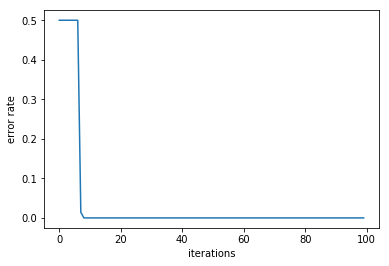

In [235]:
# Problem 1.1

import numpy as np

# cost function, given y and p
def costfunc(y,p):
    # 0-1 loss function
    cost = np.sum([1 if yy != pp else 0 for yy,pp in zip(y,p)])
    return cost

# function to calculate error metrics given the truth and prediction
def metrics(truth, prediction):
    TP = sum([y_p > 0 and y_p == y_t for y_t, y_p in zip(truth, prediction)])
    TN = sum([y_p < 0 and y_p == y_t for y_t, y_p in zip(truth, prediction)])
    FP = sum([y_p > 0 and y_p != y_t for y_t, y_p in zip(truth, prediction)])
    FN = sum([y_p < 0 and y_p != y_t for y_t, y_p in zip(truth, prediction)])
    
    acc = float(TP + TN) / len(truth)
    precision = float(TP) / (TP + FP)
    recall = float(TP) / (TP + FN)
    f_value = 2.0 * (precision * recall) / (precision + recall)
    
    return [acc, precision, recall, f_value]
    
# number of test data points
TRAINING_NUMBER = 35

# read data from text file, and map the label to {0,1}
data = np.loadtxt('Q1_data.txt',
                  delimiter=',',
                  converters={-1: lambda s: {b'Iris-versicolor': -1,
                                             b'Iris-setosa': 1}[s]
                  })

# initialize arrays for sorting inputs to test and training sets
# this adds an extra row in the matrix, which needs to be deleted later
training_set_v = np.ones(len(data[0]))
training_set_s = np.ones(len(data[0]))
test_set = np.ones(len(data[0]))

# loop thru each data point
for d in data:
    
    # if label == 1
    if d[4] == 1:  
        # if training set isn't full yet, add data point to training set
        if len(training_set_s) != TRAINING_NUMBER+1:
            training_set_s = np.vstack((training_set_s,d))
        else:
            # add data point to test set
            test_set = np.vstack((test_set,d))
    # if label == 0
    else:
        # if training set isn't full yet, add data point to training set
        if len(training_set_v) != TRAINING_NUMBER+1:
            training_set_v = np.vstack((training_set_v,d))
        else:
            # add data point to test set
            test_set = np.vstack((test_set,d))
        
# combine the training set for label 0 and 1
training_set = np.vstack((np.delete(training_set_s, (0), axis=0), np.delete(training_set_v, (0), axis=0)))

test_set = np.delete(test_set, (0), axis=0) # delete the extra top row

# separate test set into features and label
test_set_y = np.array([x[4] for x in test_set])
test_set_x = np.array([x[:4] for x in test_set])

# separate training set into features and label
training_set_y = np.array([x[4] for x in training_set]).reshape(70,1)
training_set_x = np.array([x[:4] for x in training_set])

# initialize parameters for gradient descent
w = np.array([[1],[1],[1],[1]])
b = 1
alpha = 0.001
cost_training = []
error_rate_train = []

# gradient descent
for i in range(100):

    # calculate f for training set using the given activation rule of perceptron
    f = np.array([1 if value >= 0 else -1 for value in np.dot(training_set_x,w) + b]).reshape(70,1)
    
    # update parameters
    w = w + alpha*np.dot(np.transpose(training_set_x),(training_set_y - f))
    b = b + alpha*sum(training_set_y - f)
    
    # keep track of the cost at each iteration
    cost_training.append(costfunc(training_set_y,f))
    
    # obtain classifier error rate with current parameters
    error_rate_train.append(float(costfunc(training_set_y,f)) / len(training_set_y))

f_test = [1 if value >= 0 else -1 for value in np.dot(test_set_x,w) + b]
error_rate_test = float(costfunc(test_set_y,f_test)) / len(test_set_y)
# calculate error metrics such as acc, precision, recall, and f-value
test_metric = metrics(test_set_y, f_test)

import matplotlib.pyplot as plt
plt.plot(error_rate_train)
plt.xlabel('iterations')
plt.ylabel('error rate')
plt.show()


In [236]:
# Problem 1.2

print "Decision boundary of my trained classifier:"
print "%f*x1 + %f*x2 + %f*x3 + %f*x4 + %f = 0" % (w[0], w[1], w[2], w[3], b)

Decision boundary of my trained classifier:
-0.386600*x1 + 0.522600*x2 + -0.300000*x3 + 0.564400*x4 + 0.792000 = 0


In [237]:
# Problem 1.3

print "\n".join(["Accuracy = %f", "Precision = %f", "Recall = %f", "F-value = %f"]) % tuple(test_metric)

Accuracy = 1.000000
Precision = 1.000000
Recall = 1.000000
F-value = 1.000000


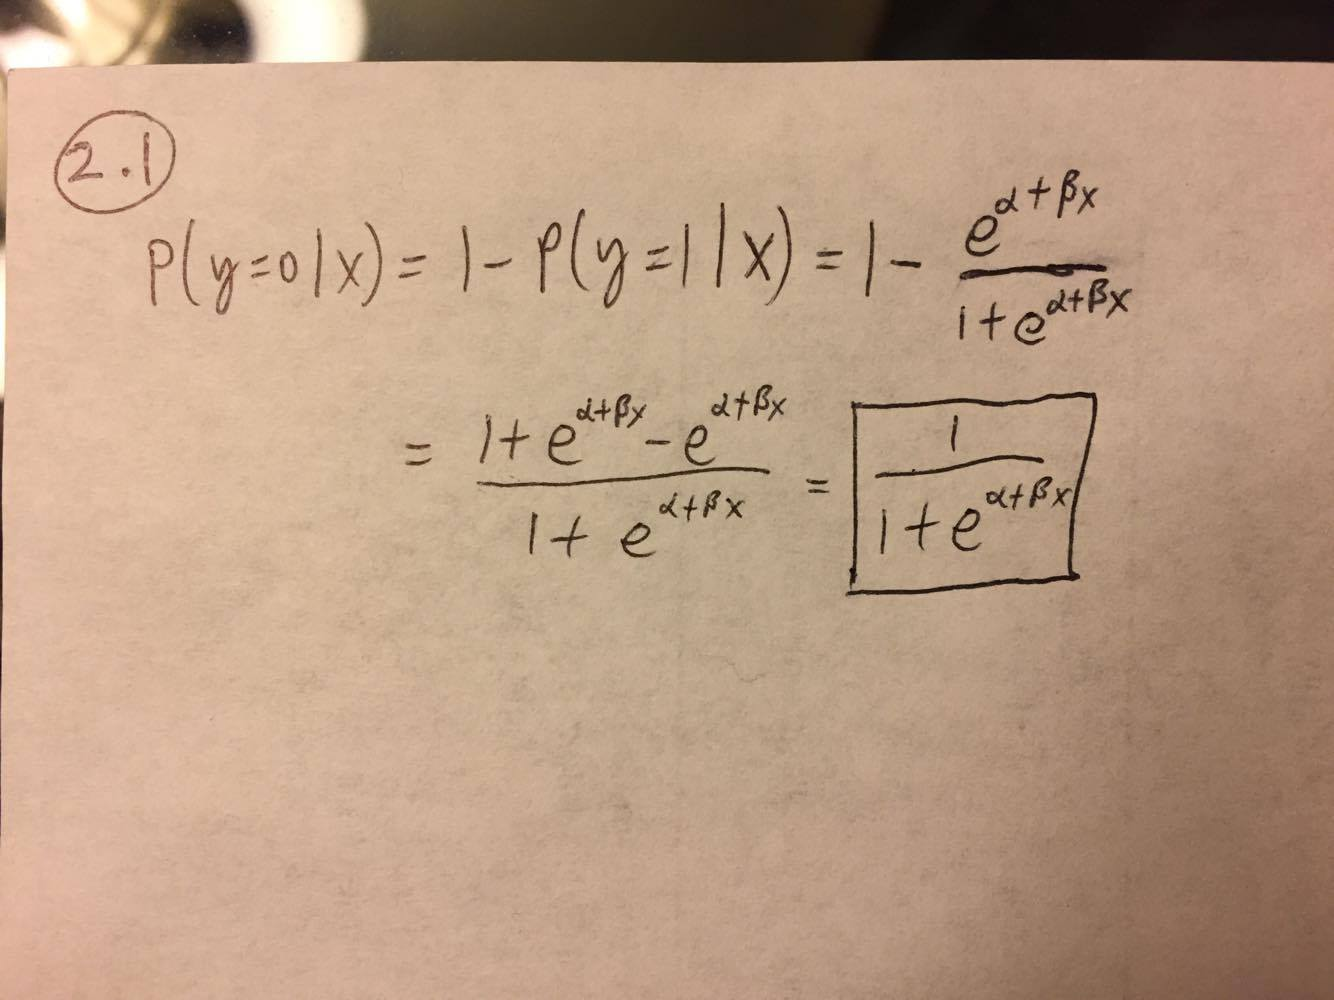

In [270]:
# Problem 2.1

from IPython.display import Image
Image("hw3_2_1.jpg")

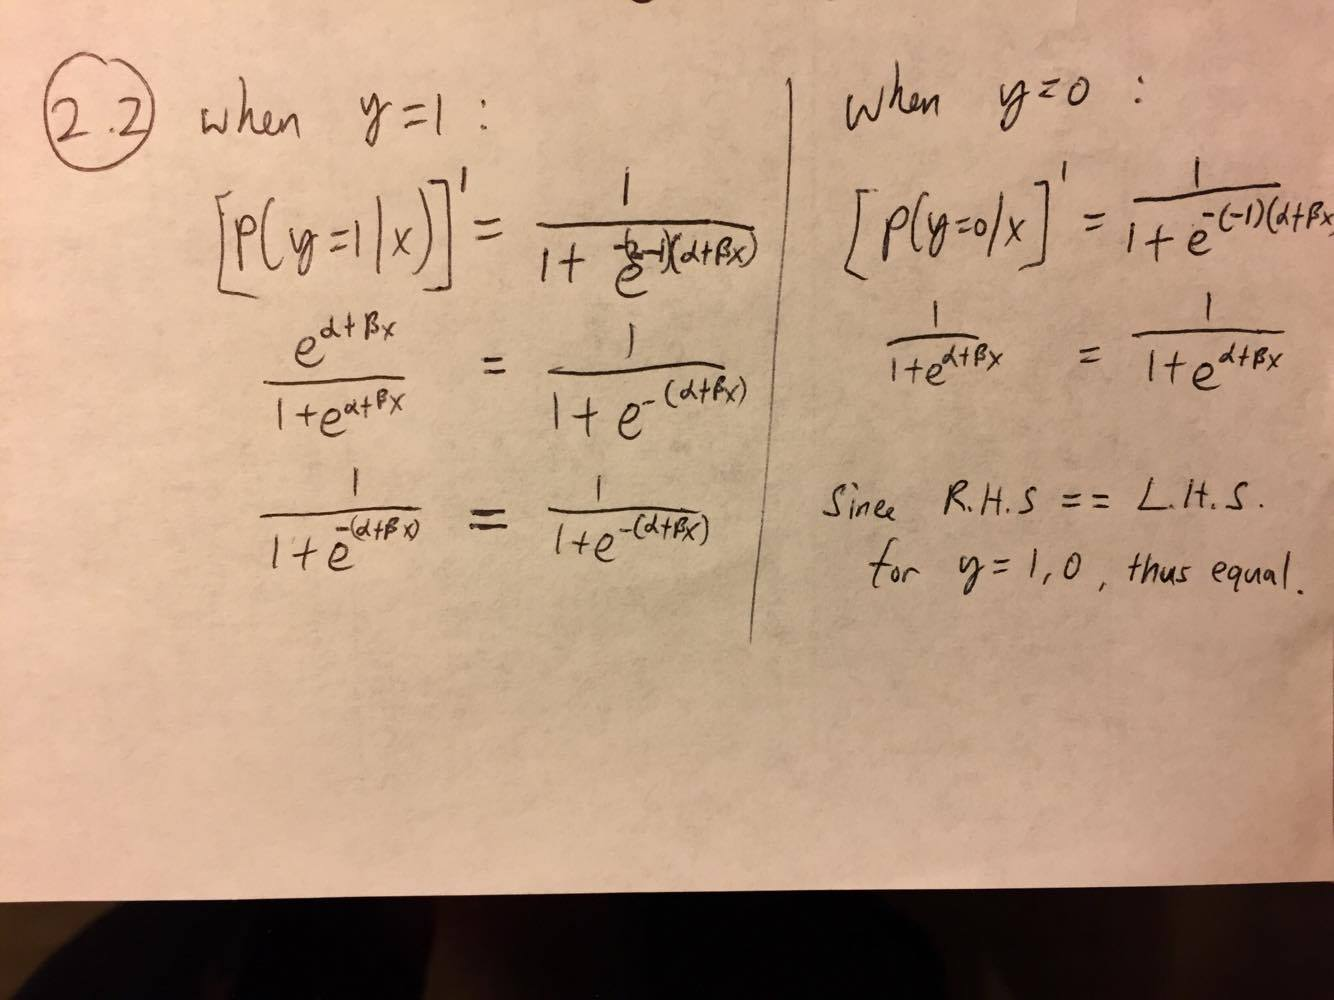

In [271]:
# Problem 2.2

from IPython.display import Image
Image("hw3_2_2.jpg")

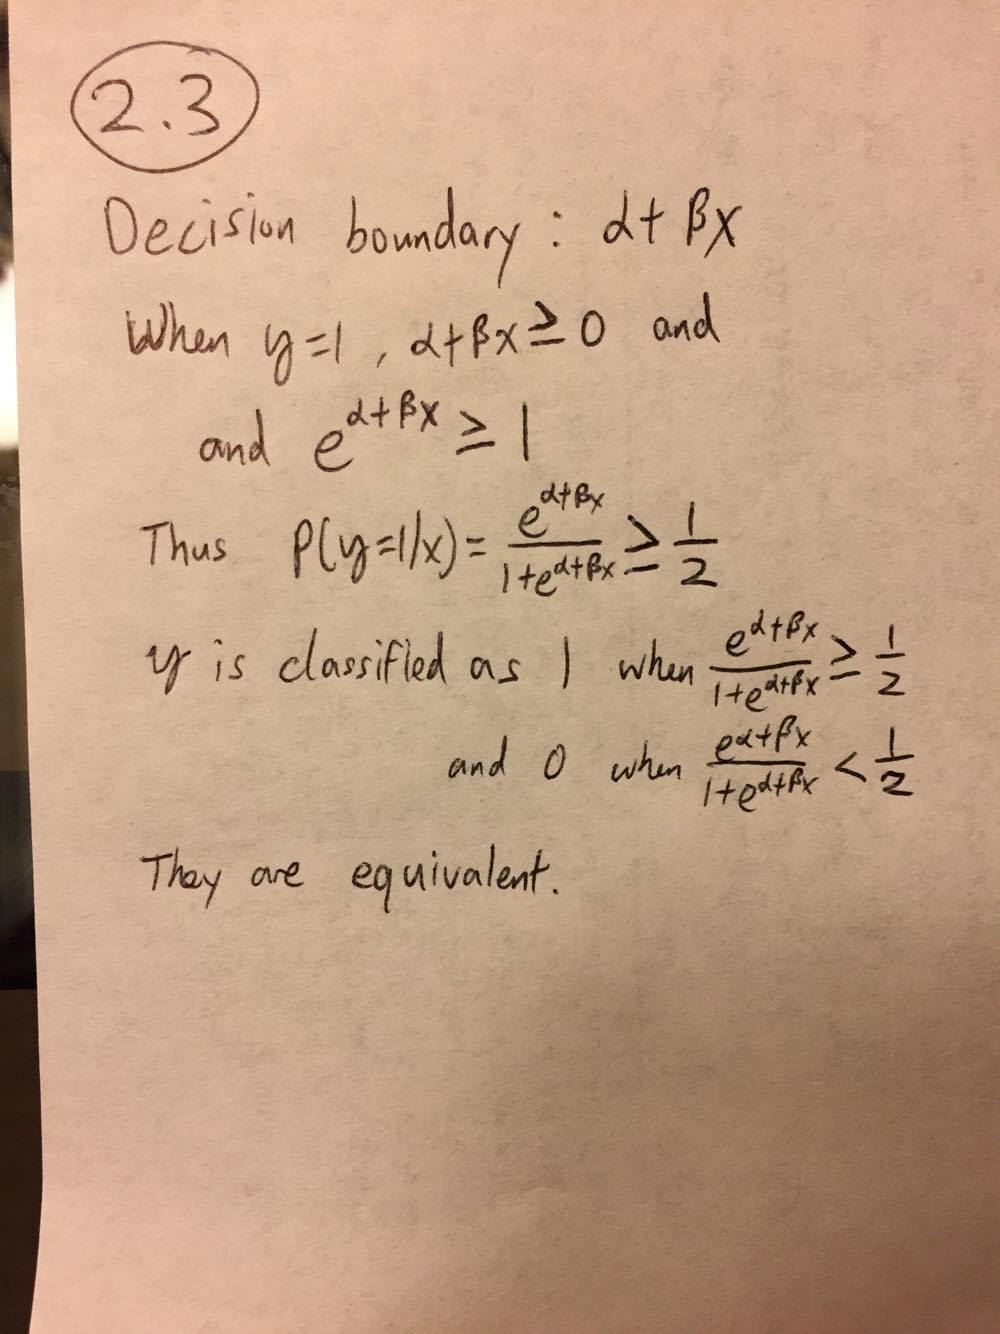

In [272]:
# Problem 2.3

from IPython.display import Image
Image("hw3_2_3.jpg")

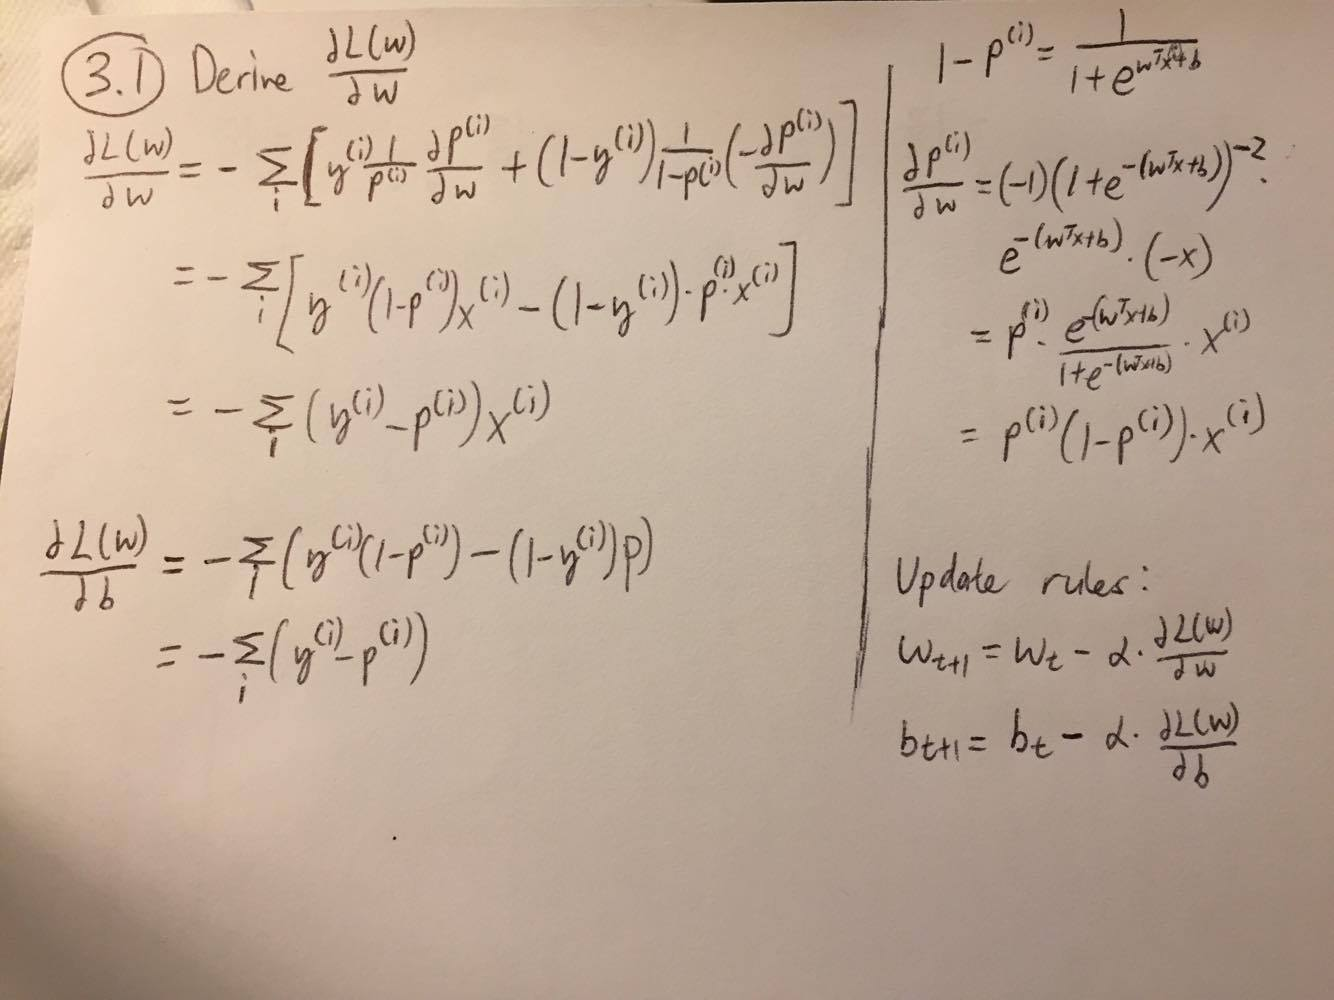

In [274]:
# Problem 3.1

from IPython.display import Image
Image("hw3_3_1.jpg")

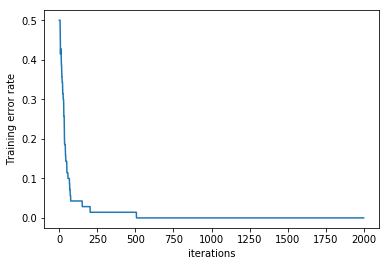

Test error rate = 0.166667
w = [[-2.9515859 ]
 [-2.69541796]
 [ 4.2208833 ]
 [ 4.27346714]]
b = [-1.16266023]


In [260]:
# Problem 3.2

import numpy as np

# cost function, given y and p
def costfunc(y,p):
    cost = -1*(np.sum((y*np.log(p)) + ((1-y)*np.log(1-p))))
    return cost

# function to calculate error metrics given the truth and prediction
def metrics(truth, prediction):
    TP = sum([y_p > 0 and y_p == y_t for y_t, y_p in zip(truth, prediction)])
    TN = sum([y_p == 0 and y_p == y_t for y_t, y_p in zip(truth, prediction)])
    FP = sum([y_p > 0 and y_p != y_t for y_t, y_p in zip(truth, prediction)])
    FN = sum([y_p == 0 and y_p != y_t for y_t, y_p in zip(truth, prediction)])
    
    acc = float(TP + TN) / len(truth)
    precision = float(TP) / (TP + FP)
    recall = float(TP) / (TP + FN)
    f_value = 2.0 * (precision * recall) / (precision + recall)
    
    return [acc, precision, recall, f_value]
    
# number of test data points
TEST_NUMBER = 15

# read data from text file, and map the label to {0,1}
data = np.loadtxt('Q3_data.txt',
                  delimiter=',',
                  converters={-1: lambda s: {b'Iris-versicolor': 0,
                                             b'Iris-virginica': 1}[s]
                  })

# initialize arrays for sorting inputs to test and training sets
# this adds an extra row in the matrix, which needs to be deleted later
test_set_ver = np.ones(len(data[0]))
test_set_vir = np.ones(len(data[0]))
training_set = np.ones(len(data[0]))

# loop thru each data point
for d in data:
    
    # if label == 1
    if d[4]:  
        # if test set isn't full yet, add data point to test set
        if len(test_set_vir) != TEST_NUMBER+1:
            test_set_vir = np.vstack((test_set_vir,d))
        else:
            # add data point to training set
            training_set = np.vstack((training_set,d))
    # if label == 0
    else:
        # if test set isn't full yet, add data point to test set
        if len(test_set_ver) != TEST_NUMBER+1:
            test_set_ver = np.vstack((test_set_ver,d))
        else:
            # add data point to training set
            training_set = np.vstack((training_set,d))
        
# combine the test set for label 0 and 1
test_set = np.vstack((np.delete(test_set_ver, (0), axis=0), np.delete(test_set_vir, (0), axis=0)))

training_set = np.delete(training_set, (0), axis=0) # delete the extra top row

# separate test set into features and label
test_set_y = np.array([x[4] for x in test_set])
test_set_x = np.array([x[:4] for x in test_set])

# separate training set into features and label
training_set_y = np.array([x[4] for x in training_set]).reshape(70,1)
training_set_x = np.array([x[:4] for x in training_set])

# initialize parameters for gradient descent
w = np.array([[1],[1],[1],[1]])
b = 1
alpha = 0.001
cost_training = []
error_rate = []

# gradient descent
for i in range(2000):

    # calculate p for training set
    p_training = 1/(1 + np.exp(-1*(np.dot(training_set_x,w) + b)))
    #print p_training
    # calculate gradient w.r.t. to each parameter
    #print training_set_y - p_training
    gradient_L_w = -1*np.dot((training_set_y - p_training).reshape(1,70),training_set_x)
    gradient_L_b = sum(-1*(training_set_y - p_training))

    # update parameters
    w = w - alpha*gradient_L_w.reshape(4,1)
    b = b - alpha*gradient_L_b
    
    # keep track of the cost at each iteration
    cost_training.append(costfunc(training_set_y,p_training))
    
    # obtain training error rate with current parameters
    p_test = 1/(1 + np.exp(-1*(np.dot(training_set_x,w) + b)))
    training_prediction = np.array([1 if p >= 0.5 else 0 for p in p_test]).reshape(70,1)
    error_rate.append(sum(abs(training_set_y - training_prediction))/len(training_set_y))

# obtain test error rate with current parameters
p_test = 1/(1 + np.exp(-1*(np.dot(test_set_x,w) + b)))
test_prediction = np.array([1 if p >= 0.5 else 0 for p in p_test]).reshape(30,1)
error_rate_test = sum(abs(test_set_y.reshape(30,1) - test_prediction))/len(test_set_y)
    
# calculate error metrics such as acc, precision, recall, and f-value
test_metric = metrics(test_set_y.reshape(30,1), test_prediction)

import matplotlib.pyplot as plt
plt.plot(error_rate)
plt.xlabel('iterations')
plt.ylabel('Training error rate')
plt.show()

print "Test error rate = %f" % error_rate_test
print "w = " + str(w)
print "b = " + str(b)

In [261]:
# Problem 3.3

print "Decision boundary of my trained classifier:"
print "%f*x1 + %f*x2 + %f*x3 + %f*x4 + %f = 0" % (w[0], w[1], w[2], w[3], b)

Decision boundary of my trained classifier:
-2.951586*x1 + -2.695418*x2 + 4.220883*x3 + 4.273467*x4 + -1.162660 = 0


In [264]:
# Problem 3.4
print "\n".join(["Accuracy = %f", "Precision = %f", "Recall = %f", "F-value = %f"]) % tuple(test_metric)

Accuracy = 0.833333
Precision = 0.750000
Recall = 1.000000
F-value = 0.857143


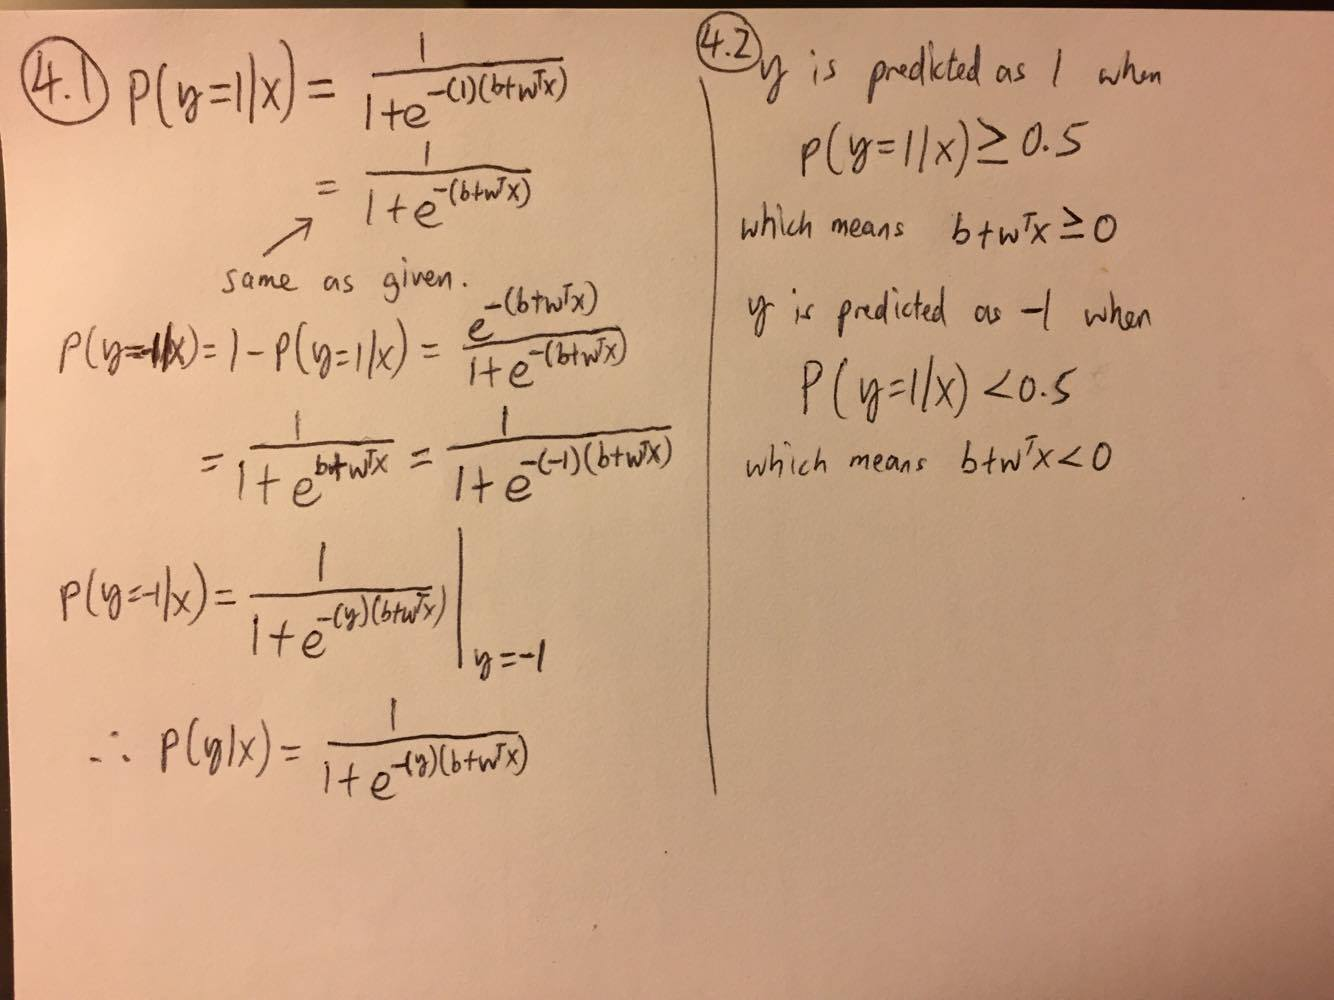

In [275]:
# Problem 4.1, 4.2

from IPython.display import Image
Image("hw3_4_1.jpg")